In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

In [342]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from scipy import stats as st
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Project : 
# Mergers and Acquisitions EDA - focus Tech companies 

## Business Questions:

### 1) what is the total number of acquistions year on year. did the acquisition rate increase over years:

### 2) Parent company ranking by number of acquisitions and total deal value year on year

### 3) What is the pattern of acquistion over the years ( in which businesses is MnA concentrated):

### 4) Countries with the highest acquisition rate year on year ranking and total value

Satrt with Data exploration and wrangling:

load 2 data sets for comparison and choice of primary set based on higher better data quality:

In [343]:
data= pd.read_csv('acquisitions.csv')
data.head()

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,ACQ98,November,11.0,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google
2,ACQ97,December,8.0,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM
3,ACQ96,December,18.0,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft
4,ACQ95,December,21.0,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft


Exploring null values, proportin and percentage of total:

In [344]:
data.isna().sum()

AcquisitionID             0
AcquisitionMonth          6
AcquisitionMonthDate     33
AcquisitionYear           0
Company                   0
Business                  0
Country                  46
Value (USD)             671
Derived products        515
ParentCompany             0
dtype: int64

In [345]:
len(data), len(data.dropna())

(916, 114)

In percentage:

In [346]:
((data.isna().sum())/len(data))*100

AcquisitionID            0.000000
AcquisitionMonth         0.655022
AcquisitionMonthDate     3.602620
AcquisitionYear          0.000000
Company                  0.000000
Business                 0.000000
Country                  5.021834
Value (USD)             73.253275
Derived products        56.222707
ParentCompany            0.000000
dtype: float64

over 73 % of acquisition price and over 56 % of derived products values are null, followed by country at 5 % and date by 3.6 %

Explore the second data set:

In [347]:
data1= pd.read_excel('acquisitions_update_2021-trial.xlsx')
data1.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [348]:
len(data1), len(data1.dropna())

(1455, 1455)

Although data1 (2 cells above)  has more rows, it also has more null values. it has a lot of '-'values in updated file. These values will be first changed to null values to aid the data quality assessment 

In [349]:
data1=data1.replace('-',np.NaN)

In [350]:
(data1.isna().sum())

ID                      0
Parent Company          0
Acquisition Year       28
Acquisition Month      58
Acquired Company        0
Business              274
Country              1114
Acquisition Price     945
Category             1445
Derived Products     1052
dtype: int64

In percentage:

In [351]:
((data1.isna().sum())/len(data1))*100

ID                    0.000000
Parent Company        0.000000
Acquisition Year      1.924399
Acquisition Month     3.986254
Acquired Company      0.000000
Business             18.831615
Country              76.563574
Acquisition Price    64.948454
Category             99.312715
Derived Products     72.302405
dtype: float64

In [352]:
len(data1), len(data1.dropna())

(1455, 0)

Given the business questions to be answered, comparing both data sets, the first dataset "data" is the preferred choice for the EDA. should there by excess time, data1 can be revisited to extract further inofrmation to further populate  acquistion price

In [353]:
#data1.loc[1]['Parent Company']

In [354]:
#data1['Acquired Company']+'-'+data1['Acquired Company']

In [355]:
data1['parent-acquired'] = data1['Parent Company']+'-'+data1['Acquired Company']

In [356]:
data1.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products,parent-acquired
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN,Apple-Network Innovations
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN,Apple-Orion Network Systems
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN,Apple-Styleware
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN,Apple-Nashoba Systems
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN,Apple-Coral Software


In [357]:
data['parent-acquired']= data['ParentCompany']+'-'+data['Company']

In [358]:
data.head()

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany,parent-acquired
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google,Google-bebop
1,ACQ98,November,11.0,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google,Google-Fly Labs
2,ACQ97,December,8.0,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM,IBM-Clearleap
3,ACQ96,December,18.0,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft,Microsoft-Metanautix
4,ACQ95,December,21.0,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft,"Microsoft-Talko, Inc."


In [359]:
data_data1merge = pd.merge(left = data,
                                  right = data1,
                                  how = 'left', 
                                  left_on = "parent-acquired", 
                                  right_on= "parent-acquired")

In [360]:
data_data1merge.isna().sum()

AcquisitionID             0
AcquisitionMonth          6
AcquisitionMonthDate     33
AcquisitionYear           0
Company                   0
Business_x                0
Country_x                46
Value (USD)             671
Derived products        515
ParentCompany             0
parent-acquired           0
ID                      307
Parent Company          307
Acquisition Year        307
Acquisition Month       312
Acquired Company        307
Business_y              374
Country_y               835
Acquisition Price       726
Category                907
Derived Products        705
dtype: int64

In [361]:
data_data1merge=data_data1merge.replace('-',np.NaN)

In [362]:
new_cols = []
def column_names(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_cols.append(x)
    df.columns = new_cols
    display(df.head())
    
column_names(data_data1merge)

,acquisitionid,acquisitionmonth,acquisitionmonthdate,acquisitionyear,company,business_x,country_x,value_(usd),derived_products,parentcompany,...,id,parent_company,acquisition_year,acquisition_month,acquired_company,business_y,country_y,acquisition_price,category,derived_products
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google,...,611.0,Google,2015.0,Nov,bebop,Cloud software,NaN,380000000,NaN,Google Cloud Platform
1,ACQ98,November,11.0,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google,...,610.0,Google,2015.0,Nov,Fly Labs,Video editing,NaN,NaN,NaN,Google Photos
2,ACQ97,December,8.0,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACQ96,December,18.0,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft,...,863.0,Microsoft,2015.0,Dec,Metanautix,Big data analytics,NaN,NaN,NaN,NaN
4,ACQ95,December,21.0,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft,...,864.0,Microsoft,2015.0,Dec,"Talko, Inc.",Mobile communications,NaN,NaN,NaN,NaN


In [363]:
data_data1merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             870 non-null    object 
 7   value_(usd)           245 non-null    float64
 8   derived_products      401 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
 11  id                    609 non-null    float64
 12  parent_company        609 non-null    object 
 13  acquisition_year      609 non-null    float64
 14  acquisition_month     604 non-null    object 
 15  acquired_company      6

In [364]:
data_data1merge['acquisition_price']=pd.to_numeric(data_data1merge['acquisition_price'], errors='coerce')

In [365]:
list(data_data1merge.columns).index('value_(usd)')

7

In [366]:
list(data_data1merge.columns).index('acquisition_price')

18

In [367]:
na_in_value_indexes=list(data_data1merge[data_data1merge['value_(usd)'].isna()==True].index)

In [368]:
data_data1merge.iloc[na_in_value_indexes,7]=data_data1merge.iloc[na_in_value_indexes,18]


In [369]:
list (data_data1merge.columns).index('country_x')

6

In [370]:
list(data_data1merge.columns).index('country_y')

17

In [371]:
na_in_country_indexes=list(data_data1merge[data_data1merge['country_x'].isna()==True].index)

In [372]:
data_data1merge.iloc[na_in_country_indexes,6]=data_data1merge.iloc[na_in_country_indexes,17]

In [373]:
data_data1merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             875 non-null    object 
 7   value_(usd)           256 non-null    float64
 8   derived_products      401 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
 11  id                    609 non-null    float64
 12  parent_company        609 non-null    object 
 13  acquisition_year      609 non-null    float64
 14  acquisition_month     604 non-null    object 
 15  acquired_company      6

In [374]:
list (data_data1merge.columns)[8]

'derived_products'

na_in_derived_products_indexes=list(data_data1merge[data_data1merge[(data_data1merge.columns)[8]].isna()==True].index)

2 columns with the name derived_products resulting in failure to index NaN value. plan: splice rename and concatenate back. 

In [375]:
data_data1merge.shape

(916, 21)

In [376]:
data1=data_data1merge.iloc[ : , :-1]

In [377]:
data1.shape

(916, 20)

In [378]:
derived_product=data_data1merge.iloc[ : ,20]

In [379]:
derived_products=pd.DataFrame(derived_product)
derived_products=derived_products.rename(columns={'derived_products':'derived_products_y'})
derived_products

,derived_products_y
0,Google Cloud Platform
1,Google Photos
2,NaN
3,NaN
4,NaN
...,...
911,NaN
912,NaN
913,"Google Play Music, Google Podcasts"
914,NaN


In [380]:
type(derived_products)

pandas.core.frame.DataFrame

In [381]:
data_data1merge=pd.concat([data1,derived_products], axis=1)
data_data1merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             875 non-null    object 
 7   value_(usd)           256 non-null    float64
 8   derived_products      401 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
 11  id                    609 non-null    float64
 12  parent_company        609 non-null    object 
 13  acquisition_year      609 non-null    float64
 14  acquisition_month     604 non-null    object 
 15  acquired_company      6

In [382]:
na_in_derivedproducts_indexes=list(data_data1merge[data_data1merge['derived_products'].isna()==True].index)

In [383]:
data_data1merge.iloc[na_in_derivedproducts_indexes,8]=data_data1merge.iloc[na_in_derivedproducts_indexes,20]

In [384]:
data_data1merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             875 non-null    object 
 7   value_(usd)           256 non-null    float64
 8   derived_products      402 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
 11  id                    609 non-null    float64
 12  parent_company        609 non-null    object 
 13  acquisition_year      609 non-null    float64
 14  acquisition_month     604 non-null    object 
 15  acquired_company      6

In [385]:
na_in_acquistionmonth_indexes=list(data_data1merge[data_data1merge['acquisitionmonth'].isna()==True].index)
data_data1merge.iloc[na_in_acquistionmonth_indexes,1]=data_data1merge.iloc[na_in_acquistionmonth_indexes,14]

In [386]:
data_data1merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             875 non-null    object 
 7   value_(usd)           256 non-null    float64
 8   derived_products      402 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
 11  id                    609 non-null    float64
 12  parent_company        609 non-null    object 
 13  acquisition_year      609 non-null    float64
 14  acquisition_month     604 non-null    object 
 15  acquired_company      6

All useful data from the merge operation has been extracted. It is time to drop off the extra redundant columns, clean and rename the retained colums:

In [387]:
dataprecleaning=data_data1merge.iloc[ : , : 11]

In [388]:
dataprecleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acquisitionid         916 non-null    object 
 1   acquisitionmonth      910 non-null    object 
 2   acquisitionmonthdate  883 non-null    float64
 3   acquisitionyear       916 non-null    int64  
 4   company               916 non-null    object 
 5   business_x            916 non-null    object 
 6   country_x             875 non-null    object 
 7   value_(usd)           256 non-null    float64
 8   derived_products      402 non-null    object 
 9   parentcompany         916 non-null    object 
 10  parent-acquired       916 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.9+ KB


In [389]:
dataprecleaning=dataprecleaning.rename(columns={'acquisitionid':'acquisition_id','acquisitionmonth':'acquisition_month',\
                                                'acquisitionmonthdate':'acquisition_monthdate','acquisitionyear':'acquisition_year',\
                                                'company':'acquired_company','business_x':'business','country_x':'country',\
                                                'value_(usd)':'acquistion_price(mil_usd)','parentcompany':'acquiring_company'})

In [390]:
dataprecleaning['country']=dataprecleaning['country'].fillna('other')

In [391]:
dataprecleaning['derived_products']=dataprecleaning['derived_products'].fillna('unclear')

In [392]:
dataprecleaning['acquisition_monthdate'].mode()[0]

1.0

In [393]:
dataprecleaning['acquisition_monthdate'] = dataprecleaning['acquisition_monthdate'].fillna(dataprecleaning['acquisition_monthdate'].mode()[0])

In [394]:
dataprecleaning['acquisition_month'].mode()

0    June
Name: acquisition_month, dtype: object

In [395]:
dataprecleaning['acquisition_month'] = dataprecleaning['acquisition_month'].fillna(dataprecleaning['acquisition_month'].mode()[0])

In [396]:
dataprecleaning['acquistion_price(mil_usd)']=(dataprecleaning['acquistion_price(mil_usd)'])/1000000

In [397]:
dataprecleaning.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acquisition_id             916 non-null    object 
 1   acquisition_month          916 non-null    object 
 2   acquisition_monthdate      916 non-null    float64
 3   acquisition_year           916 non-null    int64  
 4   acquired_company           916 non-null    object 
 5   business                   916 non-null    object 
 6   country                    916 non-null    object 
 7   acquistion_price(mil_usd)  256 non-null    float64
 8   derived_products           916 non-null    object 
 9   acquiring_company          916 non-null    object 
 10  parent-acquired            916 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.9+ KB


In [398]:
dataprecleaning['acquiring_company'].unique()

array(['Google', 'IBM', 'Microsoft', 'Apple', 'Facebook', 'Yahoo',
       'Twitter'], dtype=object)

In [399]:
data=dataprecleaning.copy()

### 1) What is the total number of acquistions year on year. did the acquisition rate increase over years

### Annual Number of acquistions: 

Investigating the avaialbe acquisition data for the last year in the date (2018) :

In [400]:
data[data['acquisition_year']==2018]

,acquisition_id,acquisition_month,acquisition_monthdate,acquisition_year,acquired_company,business,country,acquistion_price(mil_usd),derived_products,acquiring_company,parent-acquired
359,ACQ6,January,2.0,2018,Buddybuild,Feedback Platform for Development teams,CAN,NaN,"Xcode, TestFlight",Apple,Apple-Buddybuild
470,ACQ5,January,23.0,2018,Confirm,Government Issued ID Verification Platform,USA,NaN,unclear,Facebook,Facebook-Confirm
581,ACQ4,January,29.0,2018,Playfab,Gaming backend service,USA,NaN,unclear,Microsoft,Microsoft-Playfab
692,ACQ3,March,12.0,2018,Texture,Digital magazine subscription service,USA,NaN,News,Apple,Apple-Texture
803,ACQ2,March,27.0,2018,Tenor,GIF image search,USA,NaN,Google Images,Google,Google-Tenor
914,ACQ1,May,18.0,2018,Semantic Machines,Conversational AI,USA,400.0,unclear,Microsoft,Microsoft-Semantic Machines
915,AcQ916,June,4.0,2018,Github,Version Control Hosting,USA,7500.0,unclear,Microsoft,Microsoft-Github


Data runs only until end of Q2 2018. if displayed, it will provided incorrect insight about the state of affairs in 2018 and potential trends as a result. Hence, 2018 data will not be considered for the analysis. 

In [401]:
data=data[data['acquisition_year']!=2018]

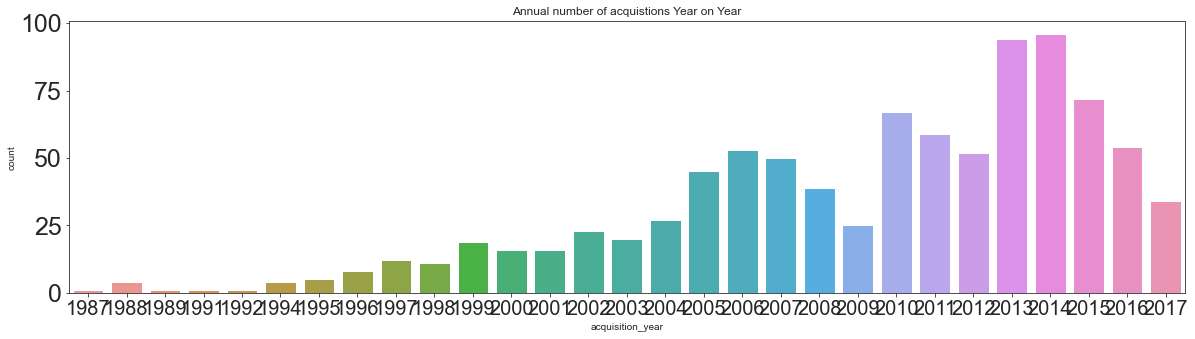

In [402]:
plt.figure(figsize = (20,5))
plt.title("Annual number of acquistions Year on Year")
sns.countplot(x='acquisition_year',data=data);

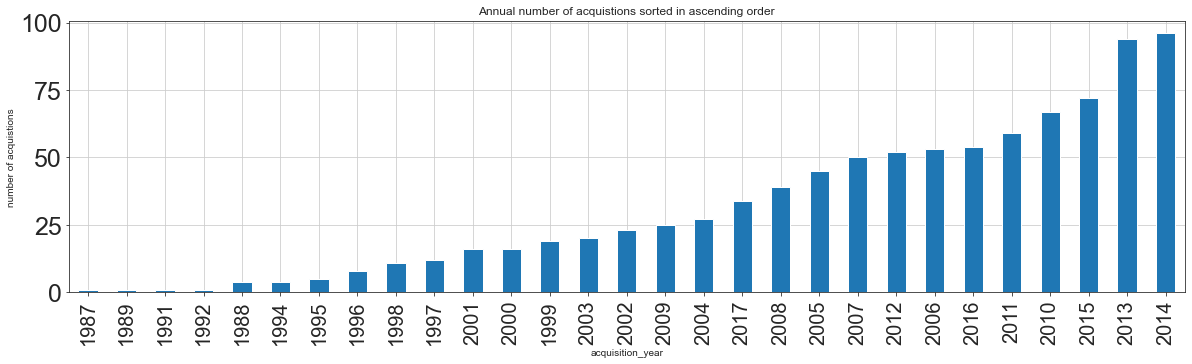

In [403]:
plt.figure(figsize = (20,5))
data['acquisition_year'].value_counts(sort = True,ascending=True).plot.bar(grid = True) 
plt.xlabel("acquisition_year")
plt.ylabel("number of acquistions")
plt.title("Annual number of acquistions sorted in ascending order")
plt.show()

<AxesSubplot:title={'center':'Annual number of acquistions Year on Year'}, xlabel='Acquisition year', ylabel='number of acquisitions'>

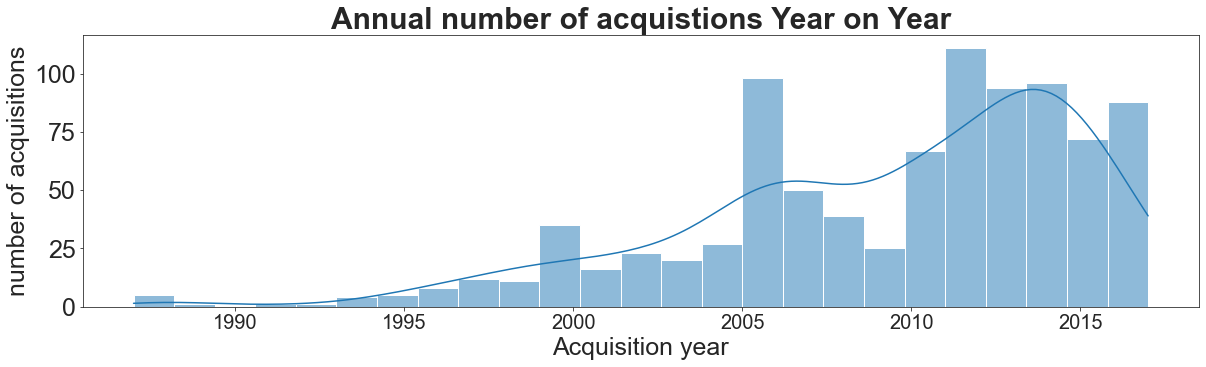

In [404]:
plt.figure(figsize=(20, 5))
sns.set_style("ticks")
plt.title("Annual number of acquistions Year on Year", fontsize=30, fontweight="bold")
plt.xlabel("Acquisition year", fontsize=25)
plt.ylabel("number of acquisitions", fontsize=25)
sns.histplot(data=data, x="acquisition_year", kde=True, bins=25)

### 2) Parent company ranking by number of acquisitions and total deal value year on year

In [405]:
company_acquisitions=data['acquiring_company'].value_counts().reset_index()
company_acquisitions=company_acquisitions.rename(columns={'index':'Acquiring Company', 'acquiring_company':'Acquisitions (1987 to 2017)'})
company_acquisitions

,Acquiring Company,Acquisitions (1987 to 2017)
0,Google,214
1,Microsoft,207
2,IBM,162
3,Yahoo,114
4,Apple,93
5,Facebook,66
6,Twitter,53


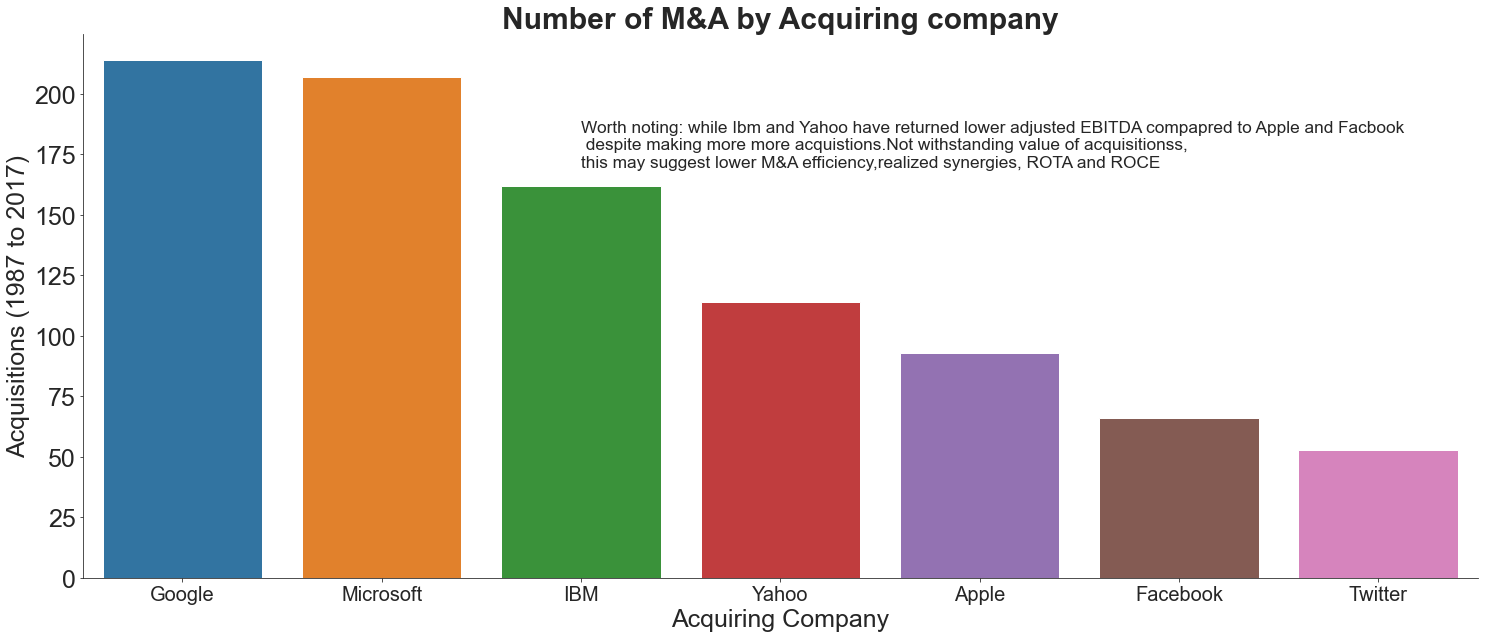

In [406]:
text = ('Worth noting: while Ibm and Yahoo have returned lower adjusted EBITDA compapred to Apple and Facbook' 
        + '\n' + ' despite making more more acquistions.Not withstanding value of acquisitionss,' + 
        '\n' + 'this may suggest lower M&A efficiency,realized synergies, ROTA and ROCE')
plt.figure(figsize=(25,10))
plt.title('Number of M&A by Acquiring company',fontsize=30, fontweight="bold")
plt.xlabel('Acquiring Company', fontsize=25)
plt.ylabel("Acquisitions (1987 to 2017)", fontsize=25)
sns.barplot(x='Acquiring Company', y='Acquisitions (1987 to 2017)', data=company_acquisitions)
plt.text(x=2, y=170, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=15);

### 3) Acquiring companyies ranking by total deal value 

In [407]:
#data.columns

In [408]:
companytotalacquisitionprice=(data.groupby("acquiring_company").agg({"acquistion_price(mil_usd)": sum})).reset_index()
companytotalacquisitionprice=companytotalacquisitionprice.rename(columns={'index':'Acquiring Company'})
#companytotalacquisitionprice=companytotalacquisitionprice.reset_index().sort_values("acquistion_price(mil_usd)", ascending=False)
companytotalacquisitionprice

#company_acquisitions=data['acquiring_company'].value_counts().reset_index()
#company_acquisitions=company_acquisitions.rename(columns={'index':'Acquiring Company', 'acquiring_company':'Acquisitions (1987 to 2017)'})
#company_acquisitions

,acquiring_company,acquistion_price(mil_usd)
0,Apple,7080.426
1,Facebook,22624.700
2,Google,30277.200
3,IBM,36268.000
4,Microsoft,63097.064
5,Twitter,1668.170
6,Yahoo,18097.100


In [409]:
#companytotalacquisitionprice=companytotalacquisitionprice.rename(columns={'acquiring_company':'Acquiring Company', 'acquistion_price(mil_usd)':'Acquisitions (1987 to 2017)'})
#companytotalacquisitionprice.shape

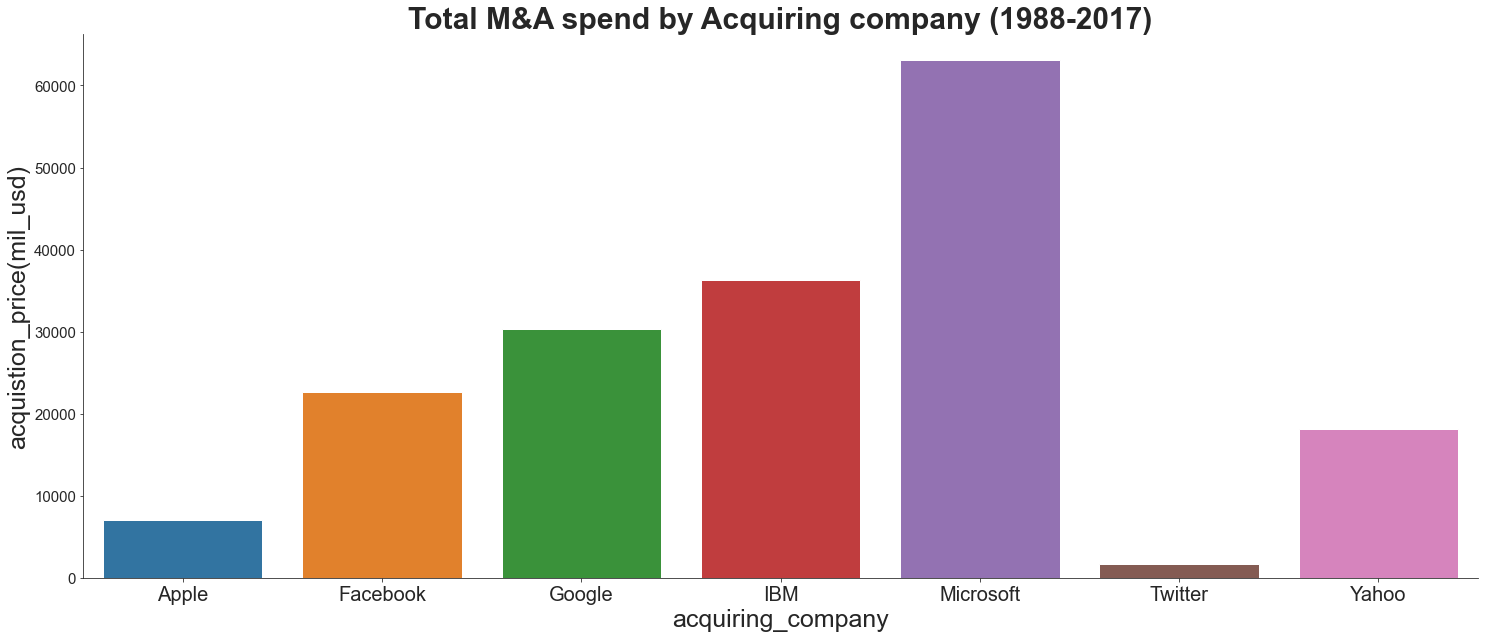

In [410]:
#text = ('Worth noting: while Ibm and Yahoo have returned lower adjusted EBITDA compapred to Apple and Facbook' 
#        + '\n' + ' despite making more more acquistions.Not withstanding value of acquisitionss,' + 
#        '\n' + 'this may suggest lower M&A efficiency,realized synergies, ROTA and ROCE')
plt.figure(figsize=(25,10))
plt.title('Total M&A spend by Acquiring company (1988-2017)',fontsize=30, fontweight="bold")
plt.xlabel('acquiring_company', fontsize=25)
plt.ylabel("acquistion_price(mil_usd)", fontsize=25)
sns.barplot(x='acquiring_company', y='acquistion_price(mil_usd)', data=companytotalacquisitionprice)
#plt.text(x=1, y=180, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=30);

In [411]:
data.to_csv('week5projectdata.csv')

In [412]:
acq_price_yoy=(data.groupby(["acquiring_company",'acquisition_year']).agg({"acquistion_price(mil_usd)": sum})).reset_index()
acq_price_yoy=acq_price_yoy.rename(columns={'index':'Acquiring Company'})

In [413]:
acq_price_yoy.shape

(119, 3)

In [414]:
acq_price_yoy.head()

,acquiring_company,acquisition_year,acquistion_price(mil_usd)
0,Apple,1988,0.000
1,Apple,1989,0.000
2,Apple,1997,514.000
3,Apple,1999,19.926
4,Apple,2000,0.000


In [415]:
#acq_price_yoy_count=acq_price_yoy.copy()
#acq_price_yoy_count.shape

In [416]:
#acq_price_yoy_count['acquisition_year'] = pd.to_datetime(acq_price_yoy_count['acquisition_year'], errors='coerce')
#acq_price_yoy_count['acquisition_year'].unique()

In [417]:
#acq_price_yoy_count['acquisition_year'] = acq_price_yoy_count.acquisition_year.apply(lambda x: x.year)
#acq_price_yoy_count['acquisition_year'].unique()

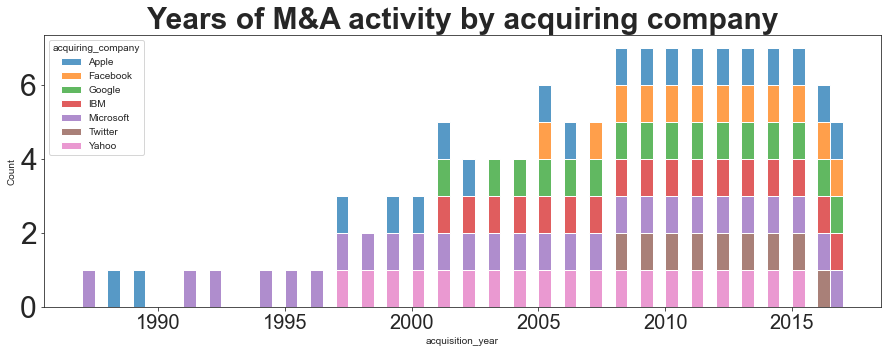

In [418]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.title('Years of M&A activity by acquiring company',fontsize=30, fontweight="bold")
sns.histplot(binwidth=0.5, x="acquisition_year", hue="acquiring_company", data=acq_price_yoy, stat="count", multiple="stack");

<div class='tableauPlaceholder' id='viz1654093233132' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nu&#47;numberacquistionsbycompany_yoy&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='numberacquistionsbycompany_yoy&#47;Sheet3' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nu&#47;numberacquistionsbycompany_yoy&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1654093233132');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

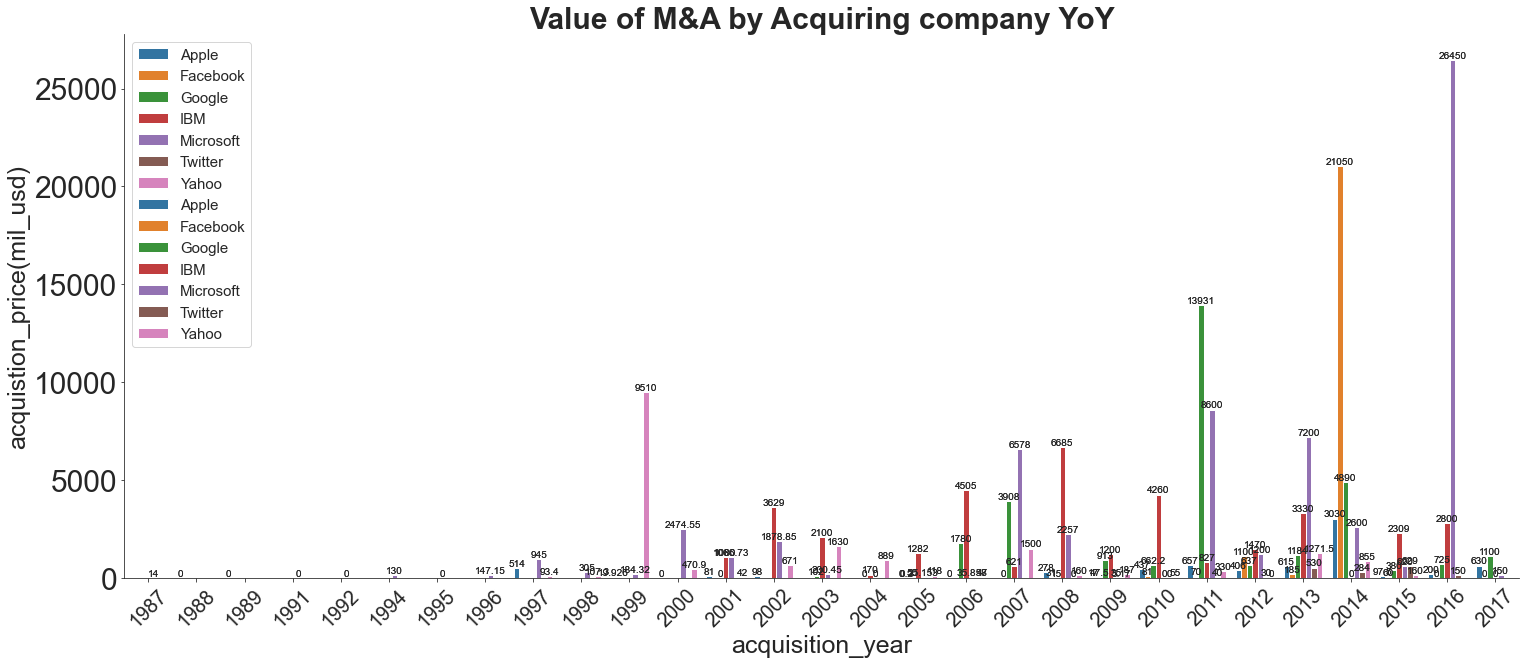

In [552]:
plt.figure(figsize=(25,10))
plt.title('Value of M&A by Acquiring company YoY',fontsize=30, fontweight="bold")
plt.xlabel('acquisition_year', fontsize=25)
plt.ylabel("acquistion_price(mil_usd)", fontsize=25)
sns.barplot(x='acquisition_year', y='acquistion_price(mil_usd)', hue="acquiring_company",data=acq_price_yoy)

#plt.text(x=2, y=170, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=30)
plt.xticks(rotation=45)
ax = sns.barplot(x='acquisition_year', y='acquistion_price(mil_usd)', hue="acquiring_company",data=acq_price_yoy)
plt.legend(prop={'size': 15}, loc=2) # legend position
sns.set_style("ticks")
# code for label values. 
for container in ax.containers: 
    ax.bar_label(container,fontsize=10);

In [420]:
company_acq_price_by_year = data.groupby(["acquiring_company",'acquisition_year']).agg({"acquistion_price(mil_usd)": sum})
company_acq_price_by_year.reset_index()

,acquiring_company,acquisition_year,acquistion_price(mil_usd)
0,Apple,1988,0.000
1,Apple,1989,0.000
2,Apple,1997,514.000
3,Apple,1999,19.926
4,Apple,2000,0.000
...,...,...,...
114,Yahoo,2011,330.000
115,Yahoo,2012,0.000
116,Yahoo,2013,1271.500
117,Yahoo,2014,855.000


In [421]:
company_acq_price_by_year.to_csv('company_acitivity2.csv')


<div class='tableauPlaceholder' id='viz1654037990536' style='position: relative'><noscript><a href='#'><img alt='Acquisition spend by company YoY ( MUSD) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ac&#47;acquiringcompaniesacquisitionpriceyearonyear1&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='acquiringcompaniesacquisitionpriceyearonyear1&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ac&#47;acquiringcompaniesacquisitionpriceyearonyear1&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1654037990536');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3) What is the pattern of acquistion over the years ( in which businesses is MnA concentrated):

In [422]:
data.columns

Index(['acquisition_id', 'acquisition_month', 'acquisition_monthdate',
       'acquisition_year', 'acquired_company', 'business', 'country',
       'acquistion_price(mil_usd)', 'derived_products', 'acquiring_company',
       'parent-acquired'],
      dtype='object')

In [423]:
business_domain = data["business"].value_counts().reset_index()
business_domain = business_domain.rename({"index": "business domain", "business": "Number of Companies acquired"}, axis=1)
Top35_business_domains = business_domain.head(34) # 35 was run to capture all companies by business with 3 aquistions.
Top35_business_domains


,business domain,Number of Companies acquired
0,Software,47
1,Internet software,9
2,Internet service provider,8
3,Online advertising,8
4,Mobile software,7
5,Advertising,7
6,Computer software,7
7,Web search engine,5
8,IT Services,5
9,Maps,5


Some of the most interesting acquisitions by business type are of small count. Note. low number of acquisitions in a domain niether reflect the size of the acquisition nor the critical importance of the acquisition to the competetive position of the acquiring company. It mearly reflect the competition in the respective domains, the associated innovation level and barriers to entry, the demand for such services (not the dollar value) and willingness of sale (market growth potential versus the price offered).With a detailed study of the acquiring companies corporate, business unit and operations strategy, valuable insight is gained as to the reasons behind the acquisition size and number. Hence the data herein is to be crossexamined against the analysis of the acquiring companies.

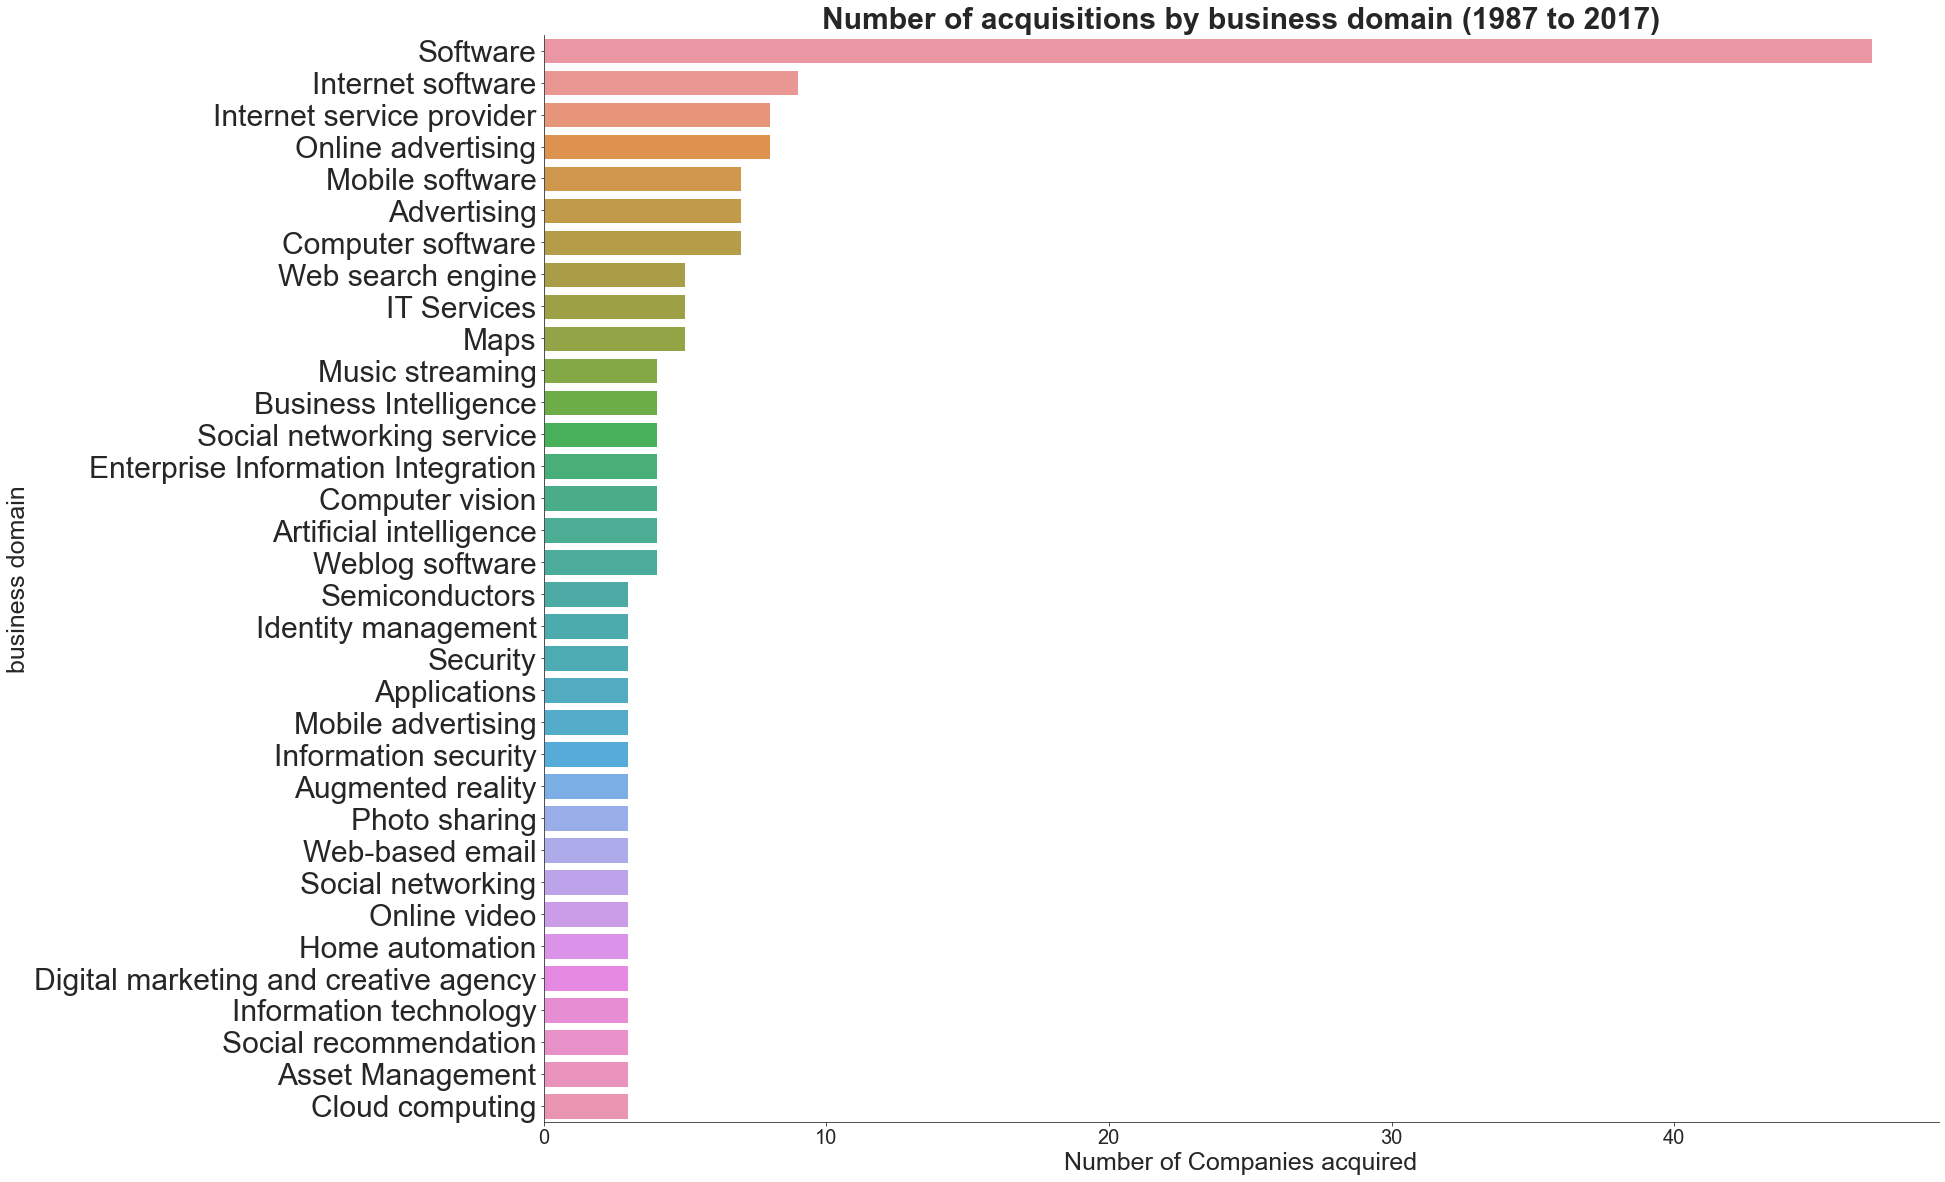

In [424]:
#text = ('Worth noting: while Ibm and Yahoo have returned lower adjusted EBITDA compapred to Apple and Facbook' 
#        + '\n' + ' despite making more more acquistions.Not withstanding value of acquisitionss,' + 
#        '\n' + 'this may suggest lower M&A efficiency,realized synergies, ROTA and ROCE')
plt.figure(figsize=(25,20))
plt.title('Number of acquisitions by business domain (1987 to 2017)',fontsize=30, fontweight="bold")
plt.xlabel('Number of Companies acquired', fontsize=25)
plt.ylabel("business domain", fontsize=25)
sns.barplot(x='Number of Companies acquired', y='business domain', data=Top35_business_domains)
#plt.text(x=1, y=180, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=25);

In [425]:
Top35_business_domains.to_csv('Top35_business_domains.csv')

Given the plot above, to glean an insight at the strategic direction  and intent of the acquiring companies, a plot of the top 35 business domains in the plot are plotted against the acquiring companies in Tableau as shown below:

plt.figure(figsize=(25,10))
plt.title('Total number of M&A by Acquiring company (1988-2017)',fontsize=30, fontweight="bold")
plt.xlabel('Acquiring company', fontsize=25)
plt.ylabel("Total Spend MUSD (1987 to 2017)", fontsize=25)
sns.barplot(x='Acquiring Company', y='Acquisitions (1987 to 2017)', data=companyyearlyacq)
plt.text(x=2, y=170, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=30);

In [426]:
#fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
#sns.histplot(binwidth=0.5, x="acquisition_year", hue=('acquistion_price(mil_usd)'), data=company_acq_price_by_year1,multiple="stack")

In [427]:
data['country'].unique()

array(['USA', 'GER', 'FIN', 'CAN', 'UK', 'SWE', 'ISR', 'TWN', 'AUS',
       'SGP', 'NOR', 'DEN', 'ROU', 'CHN', 'EU', 'IND', 'BLR', 'FRA',
       'BRA', 'ITA', 'SWI', 'SUI', 'CHE', 'NED', 'ESP', 'THA', 'BEL',
       'POR', 'United States', 'KOR', 'other', 'HKG', 'JOR', 'MYS', 'IRL',
       'IDN', 'GRE', 'LUX', 'UKR', 'AUT', 'JPN', 'NZL'], dtype=object)

In [428]:
#data['country'].value_counts()

In [429]:
data['country']= data['country'].apply(lambda x: 'USA' if x == 'United States'  else ('SUI' if x == 'SWI' else x))


In [430]:
#data['country'].value_counts()
data.reset_index(drop=True, inplace=True)
data.iloc[460:470,:]

,acquisition_id,acquisition_month,acquisition_monthdate,acquisition_year,acquired_company,business,country,acquistion_price(mil_usd),derived_products,acquiring_company,parent-acquired
460,ACQ507,May,24.0,2010,Sterling Commerce,Business software integration,USA,1400.0,unclear,IBM,IBM-Sterling Commerce
461,ACQ506,May,25.0,2010,Koprol,Geosocial network,IDN,NaN,Koprol,Yahoo,Yahoo-Koprol
462,ACQ505,May,26.0,2010,ShareGrove,Private conversations/Forums,USA,NaN,Facebook Groups,Facebook,Facebook-ShareGrove
463,ACQ504,June,3.0,2010,Invite Media,Advertising,USA,81.0,DoubleClick,Google,Google-Invite Media
464,ACQ503,June,10.0,2010,Smallthought Systems,Databases and analytics,other,NaN,Analytics tools,Twitter,Twitter-Smallthought Systems
465,ACQ502,June,15.0,2010,Coremetrics,Web Analytics,USA,NaN,unclear,IBM,IBM-Coremetrics
466,ACQ501,July,1.0,2010,"BigFix, Inc.",Security and IT automation software,USA,NaN,unclear,IBM,"IBM-BigFix, Inc."
467,ACQ500,July,8.0,2010,Nextstop,Travel recommendations,USA,2.5,unclear,Facebook,Facebook-Nextstop
468,ACQ50,October,24.0,2016,Eyefluence,"Eye tracking, virtual reality",other,NaN,Google VR,Google,Google-Eyefluence
469,ACQ499,July,14.0,2010,Poly9,Web-based mapping,CAN,NaN,Apple Maps,Apple,Apple-Poly9


In [431]:
data[data['country']=='other']

,acquisition_id,acquisition_month,acquisition_monthdate,acquisition_year,acquired_company,business,country,acquistion_price(mil_usd),derived_products,acquiring_company,parent-acquired
401,ACQ560,November,24.0,2008,Values of n,Social software development,other,NaN,unclear,Twitter,Twitter-Values of n
429,ACQ535,December,23.0,2009,Mixer labs,Location information engine,other,5.17,unclear,Twitter,Twitter-Mixer labs
447,ACQ519,April,23.0,2010,Cloudhopper,Mobile messaging,other,NaN,unclear,Twitter,Twitter-Cloudhopper
457,ACQ51,October,11.0,2016,FameBit,Branded content,other,NaN,YouTube,Google,Google-FameBit
464,ACQ503,June,10.0,2010,Smallthought Systems,Databases and analytics,other,NaN,Analytics tools,Twitter,Twitter-Smallthought Systems
468,ACQ50,October,24.0,2016,Eyefluence,"Eye tracking, virtual reality",other,NaN,Google VR,Google,Google-Eyefluence
503,ACQ468,December,21.0,2010,Fluther,Q&A service,other,NaN,unclear,Twitter,Twitter-Fluther
523,ACQ45,November,21.0,2016,Qwiklabs,Cloud based hands-on training platform,other,NaN,Google Cloud Platform,Google,Google-Qwiklabs
526,ACQ447,June,1.0,2011,AdGrok,Advertising,other,NaN,unclear,Twitter,Twitter-AdGrok
533,ACQ440,July,5.0,2011,BackType,Social analytics,other,NaN,unclear,Twitter,Twitter-BackType


In [434]:
data[data['country']=='EU']

,acquisition_id,acquisition_month,acquisition_monthdate,acquisition_year,acquired_company,business,country,acquistion_price(mil_usd),derived_products,acquiring_company,parent-acquired
167,ACQ772,March,26.0,2004,Kelkoo,Price comparison service,EU,579.0,Kelkoo,Yahoo,Yahoo-Kelkoo
185,ACQ756,October,2.0,2004,The All-Seeing Eye,Game server browser,EU,NaN,Yahoo! Games,Yahoo,Yahoo-The All-Seeing Eye
300,ACQ652,November,17.0,2006,Kenet Works,Mobile software,EU,25.0,Yahoo! Mobile,Yahoo,Yahoo-Kenet Works


In [435]:
data.country = list(map(lambda x,y: 'CAN' if x == 'other' and y == 'Smallthought Systems' else ('CAN' if x== 'other' and y == 'Summify' else x), data.country, data.acquired_company))

In [436]:
data.country = list(map(lambda x,y: 'UK' if x == 'EU' and y == 'Kelkoo' else ('FIN' if x== 'EU' and y == 'The All-Seeing Eye' else 'SWE' if x== 'EU' and y == 'Kenet Works' else x), data.country, data.acquired_company))

In [437]:
#def replace_company(x,y):
#    if ( (x == "EU") and (y == "Kelkoo") ):
#        return "UK"
#    elif ( (x == "EU") and (y == "The All-Seeing Eye"):
#          return "FIN"
#    elif ( (x == "EU") and (y == "Kenet Works")):
#          return "SWE"
          
#data['country'] = list(map(replace_company, data['country'], data['acquired_company'] ))
        

In [438]:
#data['country'].value_counts()

In [439]:
def othercountry(text):
    if text =="other":
        return 'USA'
    else:
        return text

In [440]:
data['country']=data['country'].apply(othercountry)

In [443]:
acq_by_country=data['country'].value_counts().reset_index()
acq_by_country=acq_by_country.rename({'index':'Country','country':'Number of Acquisitions'}, axis=1)
acq_by_country

,Country,Number of Acquisitions
0,USA,670
1,CAN,48
2,UK,35
3,ISR,32
4,GER,17
5,FRA,13
6,SWE,11
7,AUS,11
8,IND,8
9,FIN,8


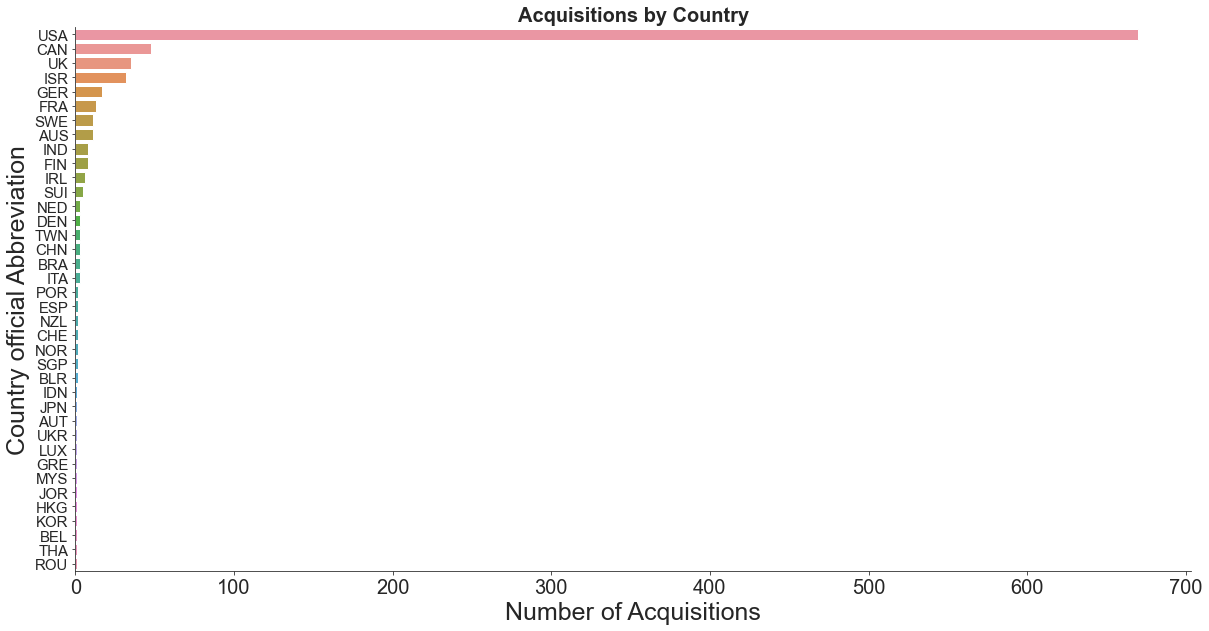

In [446]:
plt.figure(figsize=(20, 10))
plt.title("Acquisitions by Country",fontsize=20, fontweight="bold")
sns.barplot(data=acq_by_country, y="Country",x='Number of Acquisitions')

plt.xlabel("Number of Acquisitions", fontsize=25)
plt.ylabel("Country official Abbreviation", fontsize=25)
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=15);

In [445]:
data.to_csv('week5projectdata.csv')

In [447]:
data.columns

Index(['acquisition_id', 'acquisition_month', 'acquisition_monthdate',
       'acquisition_year', 'acquired_company', 'business', 'country',
       'acquistion_price(mil_usd)', 'derived_products', 'acquiring_company',
       'parent-acquired'],
      dtype='object')

now for an interesting look on competitive strength and capabilities:

In [448]:
strategy=(data.groupby(['acquiring_company','derived_products','business','acquisition_year']).agg({'acquistion_price(mil_usd)':sum,'acquired_company':pd.Series.nunique})).reset_index()
strategy

,acquiring_company,derived_products,business,acquisition_year,acquistion_price(mil_usd),acquired_company
0,Apple,ARKit,Augmented reality head-mounted display,2017,30.0,1
1,Apple,ARKit,Eye tracking hardware and software,2017,0.0,1
2,Apple,ARkit,Augmented reality,2015,0.0,1
3,Apple,ARkit,Augmented reality,2016,0.0,1
4,Apple,Animoji,Realtime Motion Capture,2015,0.0,1
...,...,...,...,...,...,...
854,Yahoo,unclear,Video Conferencing,2013,0.0,1
855,Yahoo,unclear,Video Streaming Platform,2014,0.0,1
856,Yahoo,unclear,Video sharing,2013,6.5,1
857,Yahoo,unclear,Virtual world gaming,2014,0.0,1


In [449]:
strategy.to_csv('acquiring_prd_acqnumb.csv')

In [491]:
#business_domain_value[business_domain_value['business'].value_counts()>2]
#business_domain_valuetop35=
game=(data.groupby(['acquiring_company','business']).agg({'acquistion_price(mil_usd)':sum})).reset_index()
game

,acquiring_company,business,acquistion_price(mil_usd)
0,Apple,3D mapping,267.0
1,Apple,Analytics,200.0
2,Apple,App search engine,50.0
3,Apple,Application localization,12.0
4,Apple,Artificial intelligence,200.0
...,...,...,...
744,Yahoo,Weblog software,0.0
745,Yahoo,Webmail applications,20.0
746,Yahoo,Widget engine,0.0
747,Yahoo,Wireless data sharing,58.0


In [492]:
game1=game[game['acquistion_price(mil_usd)']>0]
game1

,acquiring_company,business,acquistion_price(mil_usd)
0,Apple,3D mapping,267.0
1,Apple,Analytics,200.0
2,Apple,App search engine,50.0
3,Apple,Application localization,12.0
4,Apple,Artificial intelligence,200.0
...,...,...,...
742,Yahoo,Web search engine,1.4
743,Yahoo,Web-based email,122.0
745,Yahoo,Webmail applications,20.0
747,Yahoo,Wireless data sharing,58.0


In [501]:
game2=(game1.sort_values("acquistion_price(mil_usd)", ascending=False).head(35)).reset_index()
game2.head()

,index,acquiring_company,business,acquistion_price(mil_usd)
0,557,Microsoft,Professional Networking Service,26200.0
1,108,Facebook,Mobile messaging,19000.0
2,221,Google,Mobile device manufacturer,12500.0
3,582,Microsoft,Telecommunications,8500.0
4,543,Microsoft,"Mobile phones, smartphones",7200.0


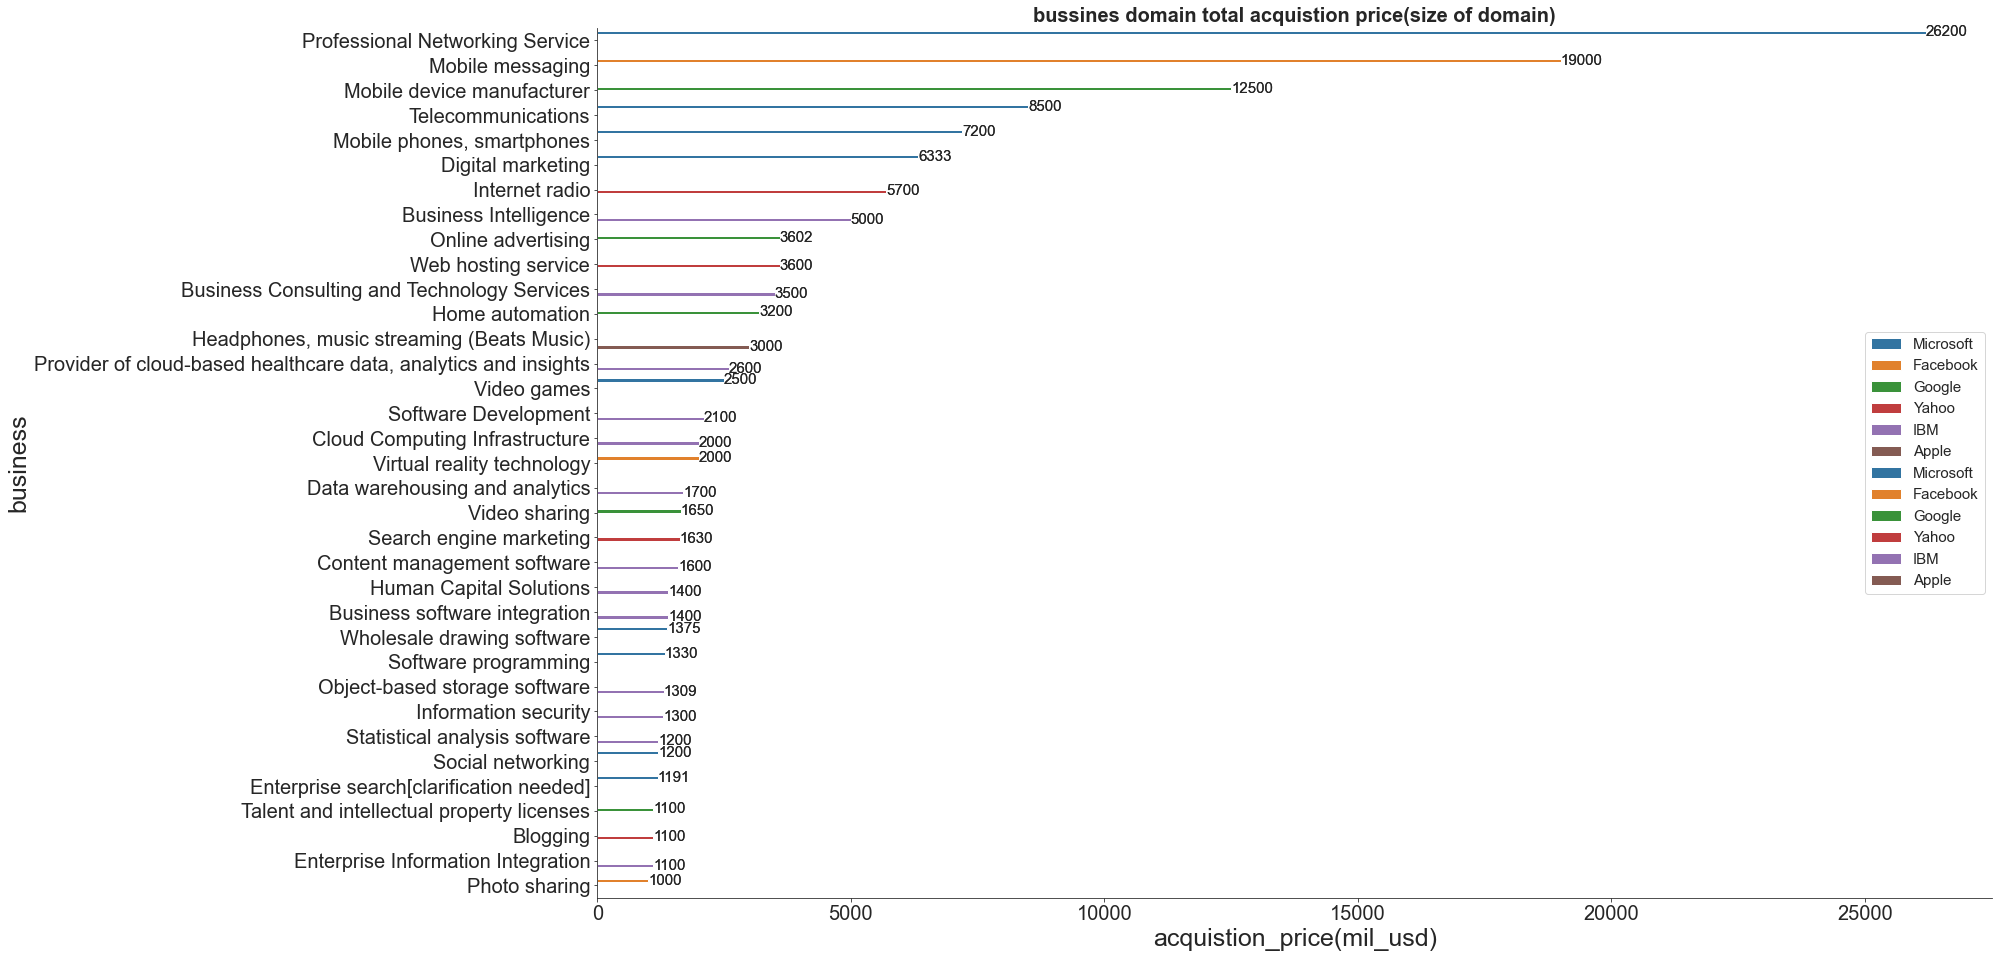

In [545]:
plt.figure(figsize=(25,16))
sns.set_style("ticks")
plt.title('bussines domain total acquistion price(size of domain)',fontsize=20, fontweight="bold")
plt.xlabel('acquistion_price(mil_usd)', fontsize=25)
plt.ylabel("business", fontsize=25)
sns.barplot(x='acquistion_price(mil_usd)', y='business', hue="acquiring_company",data=game2)

#plt.text(x=2, y=170, s=text, size='xx-large')
sns.despine()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=15)
ax=sns.barplot(x='acquistion_price(mil_usd)', y='business', hue="acquiring_company",data=game2)
plt.legend(prop={'size': 15}, loc=5) # legend position
for container in ax.containers: 
    ax.bar_label(container,fontsize=15);

In [ ]:
#prod_comp_acq=(data.groupby(["acquiring_company",'acquisition_year']).agg({"acquistion_price(mil_usd)": sum})).reset_index()
#acq_price_yoy=acq_price_yoy.rename(columns={'index':'Acquiring Company'})

In [338]:
data_crosstab = pd.crosstab(data['acquiring_company'], data['business'], margins = False)
data_crosstab

business,(Mobile) application development,.Net monitoring technology,3-D sensing technology,360-degree photography,3D Gaming,3D graphics hardware,3D mapping,3D modeling software,A/B Tester,AI-powered scheduling assistant service,...,Widget engine,Wireless,Wireless charging,Wireless data sharing,Word processor,Wunderlist to-do list applications,application virtualization software,ecommerce Analytics,internet and network optimization for wireless carriers,microLED displays
acquiring_company,,,,,,,,,,,,,,,,,,,,,
Apple,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
Facebook,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
IBM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microsoft,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
Twitter,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Yahoo,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [339]:
st.chi2_contingency(data_crosstab)

(4888.207274890737,
 4.472503945332496e-12,
 4230,
 array([[0.10231023, 0.10231023, 0.10231023, ..., 0.10231023, 0.10231023,
         0.10231023],
        [0.07260726, 0.07260726, 0.07260726, ..., 0.07260726, 0.07260726,
         0.07260726],
        [0.23542354, 0.23542354, 0.23542354, ..., 0.23542354, 0.23542354,
         0.23542354],
        ...,
        [0.22772277, 0.22772277, 0.22772277, ..., 0.22772277, 0.22772277,
         0.22772277],
        [0.05830583, 0.05830583, 0.05830583, ..., 0.05830583, 0.05830583,
         0.05830583],
        [0.12541254, 0.12541254, 0.12541254, ..., 0.12541254, 0.12541254,
         0.12541254]]))

In [340]:
st.chi2.ppf(0.95,df=4230)

4382.419238827069

H0: both variables are independent.
Accept H1: variables are realted.